# Numpy basics

This notebook was adapted from the one made by Brian d'Alessandro for the class DS-GA-1001 Introduction to Data Science where it was in turn adapted from chapter 4 Python for Data Analysis by Wes McKinney and O'Reilly publishing. 

NumPy has many features that will not be covered here. The following snippets are just to illustrate basic data types and operations within numpy.

The core data type in Numpy is the ndarray, which enables fast and space-efficient multidimensional array processing. Another good resource for learning more about ndarrays is here:
http://docs.scipy.org/doc/numpy/reference/arrays.html

First import numpy:

In [1]:
import numpy as np

## Creating arrays

The easiest way to create an array is to transform a standard Python list(s) using the *array* function.

In [3]:
#It is easy to create Nx1 and NxM arrays from standard Python lists
list1 = [0,1,2]
list2 = [3,4,5]

nd1 = np.array(list1)
nd2 = np.array([list1, list2])

In [13]:
nd1

array([0, 1, 2])

In [7]:
nd2

array([[0, 1, 2],
       [3, 4, 5]])

Now, we can ask for some basic info to describe the ndarray using the *shape* and *dtype* properties of the ndarray objects. While it might be counterintuitive looking at the above output, one dimensional arrays are always treated as column vectors. 

In [14]:
def desc_ndarray(nd):
    try:
        print("The ndarray has dimension n=%s and m=%s" % (nd.shape[0],nd.shape[1]))
    except:
        print("The ndarray has dimension n=%s and m=1" % nd.shape[0])
    print("The ndarray has elements of type=%s" % nd.dtype)

desc_ndarray(nd1)
desc_ndarray(nd2)

The ndarray has dimension n=3 and m=1
The ndarray has elements of type=int64
The ndarray has dimension n=2 and m=3
The ndarray has elements of type=int64


## Special arrays

There are shortcuts for creating certain frequently used special ndarrays, for example, an array of zeros, ones, and independent standard normal random elements:

In [27]:
k=4
n = 2
m = 3

# An ndarray of all zeros
zero = np.zeros((n,m))

# An ndarray of all ones
one = np.ones(k)

# An ndarray of random elements (this one is standard normal, 
# but there are many distributions to choose from). Notice the
# difference in passing the dimensions
rand = np.random.randn(3,5)

[zero, one, rand]

[array([[ 0.,  0.,  0.],
        [ 0.,  0.,  0.]]),
 array([ 1.,  1.,  1.,  1.]),
 array([[ 0.8113783 ,  0.58640127, -1.96671183, -0.09040065,  0.95667661],
        [-1.37380643, -0.5526485 ,  1.44044601,  0.55816168,  1.07738991],
        [ 0.22607842,  0.91489988,  0.80510683,  0.02424776, -1.23607024]])]

To generate a range that is automatically a numpy array, we can use the *arange()* method:

In [69]:
np.arange(100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

## Array indexing

For indexing an array:
    1. If nx1 array, follow the same protocol for a regular Python list
    2. If nxm array look at the following examples.
Do not forget that indexing starts at zero!

In [29]:
# A single index gets a full row, while 2 indexes returns a value
[rand, rand[1], rand[1,1]]

[array([[ 0.8113783 ,  0.58640127, -1.96671183, -0.09040065,  0.95667661],
        [-1.37380643, -0.5526485 ,  1.44044601,  0.55816168,  1.07738991],
        [ 0.22607842,  0.91489988,  0.80510683,  0.02424776, -1.23607024]]),
 array([-1.37380643, -0.5526485 ,  1.44044601,  0.55816168,  1.07738991]),
 -0.55264850313956193]

You might ask how to select a column. We can use slicing, which you can also do on lists:

https://www.pythoncentral.io/how-to-slice-listsarrays-and-tuples-in-python/

In [32]:
rand[:,2]

array([-1.96671183,  1.44044601,  0.80510683])

## Operations between Arrays and Scalars

An important feature of ndarrays is they allow batch operations on data without writing any for loops. This is called vectorization. Any arithmetic operations between equal-size arrays applies the operation elementwise. Arithmetic operations with scalars are also as you would expect, propagating the value to each element also referred to as broadcasting:

https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html

In [63]:
k = 4
rand = np.random.randn(k)
[rand, rand + rand, 2*rand, rand*np.zeros(4)]

[array([ 2.28056974,  1.3041093 ,  0.25426496,  1.07246005]),
 array([ 4.56113949,  2.6082186 ,  0.50852991,  2.1449201 ]),
 array([ 4.56113949,  2.6082186 ,  0.50852991,  2.1449201 ]),
 array([ 0.,  0.,  0.,  0.])]

In [64]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])

[1/arr, arr ** 0.5]

[array([[ 1.        ,  0.5       ,  0.33333333],
        [ 0.25      ,  0.2       ,  0.16666667]]),
 array([[ 1.        ,  1.41421356,  1.73205081],
        [ 2.        ,  2.23606798,  2.44948974]])]

It is easy to do matrix operations with ndarrays. It is important to make sure matrix shapes are compatible.

Matrix addition is the standard matrix operator:

In [65]:
k = 3
r1 = np.random.randn(k)
r2 = np.random.randn(k)

[r1, r2 , r1 + r2]

[array([ 0.87536263,  0.86097065, -1.23648092]),
 array([-0.70741949, -0.41719535,  0.90668548]),
 array([ 0.16794314,  0.44377531, -0.32979544])]

The Transpose can be taken with the attribute T:

In [66]:
arr2d = np.array([r1, r2])
[arr2d, arr2d.T]

[array([[ 0.87536263,  0.86097065, -1.23648092],
        [-0.70741949, -0.41719535,  0.90668548]]),
 array([[ 0.87536263, -0.70741949],
        [ 0.86097065, -0.41719535],
        [-1.23648092,  0.90668548]])]

Matrix multiplication, like inner products can be done on arrays. Just remember that the standard multiplication operator does elementwise multiplication (provided the two matrices are the same shape). We need the dot method in order to do an inner product.

Numpy has a linalg library that can run most matrix operations on ndarrays:
http://docs.scipy.org/doc/numpy/reference/routines.linalg.html

One can also create a matrix object and use the methods in numpy.matrix to achieve the same thing:
http://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.html

For example matrix multiplication is done by the *dot* method of the ndarray object.

In [67]:
[arr2d, arr2d * arr2d, arr2d.dot(arr2d.T), arr2d.T.dot(arr2d)]

[array([[ 0.87536263,  0.86097065, -1.23648092],
        [-0.70741949, -0.41719535,  0.90668548]]),
 array([[ 0.76625973,  0.74127046,  1.52888506],
        [ 0.50044233,  0.17405196,  0.82207857]]),
 array([[ 3.03641526, -2.09954083],
        [-2.09954083,  1.49657286]]),
 array([[ 1.26670206,  1.04879365, -1.72377617],
        [ 1.04879365,  0.91532242, -1.44283875],
        [-1.72377617, -1.44283875,  2.35096363]])]

## Vectorization vs. loops

One important feature of vectorization is that it allows elementwise processing that is much faster than writing a traditional for loop or list comprehension for the same task:

In [8]:
import math

#show an example and profile it
%timeit [math.sqrt(x) for x in range(1000)]

10000 loops, best of 3: 174 µs per loop


In [42]:
%timeit np.sqrt(np.arange(1000))

The slowest run took 12.32 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 5.86 µs per loop


## Random numbers

The last thing we'll cover in this module is the numpy.random library. In general, it is advised to use numpy for random number generation as opposed to Python's built in random module.

Random number generation has many uses. One common use is generating fake (i.e. random) data to test modeling procedures or to do Monte Carlo Simulations (solving deterministic problems numerically through random sampling).

For example, let us generate random pairs that have a multivariate normal joint distribution.

In [55]:
N = 1000
mu = np.array([0,0])
cov = 0.5
sig = np.array([[1, cov],[cov, 1]]) #Must be square, symmetric and non-negative definite

In [56]:
x, y = np.random.multivariate_normal(mu, sig, N).T

Let us now plot our results using the matplotlib.pyplot library

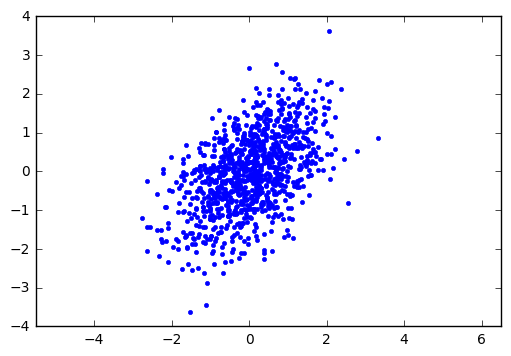

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline 

# The previous line tells ipython to show the plots in the notebook, instead of opening
# a separate window.

plt.plot(x, y,'.') 
plt.axis('equal') 
plt.show()

Finally, let us generate a random walk and visualize it:

In [58]:
nsteps = 1000

*randint* lets us generate random integers in a range.

In [59]:
draws = np.random.randint(0, 2, size = nsteps) 

The where function lets us do boolean logic on a conditional applied to an entire array. In the lines below, steps becomes a vector of length *nsteps* with entry $i$ being one if the $i$ entry in *draws* is greater than zero and $-1$ otherwise.

In [60]:
steps = np.where(draws > 0, 1, -1) 

Cumsum returns an array with the same size as steps, that stores the cumulative sum of steps up to index i.

In [61]:
walk = steps.cumsum()

Finally, let us plot our walk:

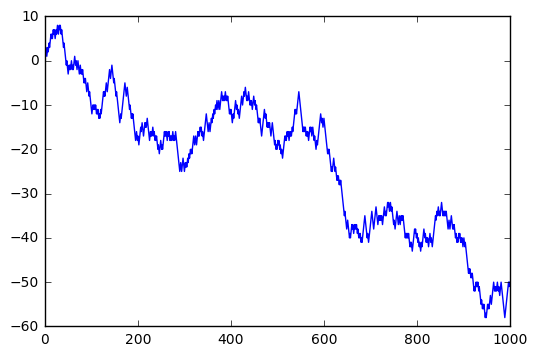

In [62]:
plt.plot(np.arange(len(walk)), walk)
plt.show()